# Multi Layer Percepron (MLP) with Scikit Learn

## Libraries

In [1]:
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

## MLP

<div class="alert alert-block alert-info">
    
The **multi layer perceptron (MLP)** is feedforward neural network composed of successive layers (cf. Figure below).

<img src="files/figures/MLP.jpg" width="600px"/>
 
The dynamics of an MLP is given by the following equations (sample and batch versions):

$$
\begin{array}{ll}
\textbf{sample $\boldsymbol{x}$} & \textbf{batch $\boldsymbol{X_i}$} \\
\begin{cases}
\boldsymbol{a^{[0]}} ~=~ \boldsymbol{x} & \\
\boldsymbol{z^{[l]}} ~=~ \boldsymbol{W^{[l]}} \boldsymbol{a^{[l-1]}} + \boldsymbol{b^{[l]}}, & l = 1, \dots, L \\
\boldsymbol{a^{[l]}} ~=~ \boldsymbol{\sigma} \left( \boldsymbol{z^{[l]}} \right), & l = 1, \dots, L
\end{cases}
~&~
\begin{cases}
\boldsymbol{A^{[0]}} ~=~ \boldsymbol{X_i}	\\
\boldsymbol{Z^{[l]}} ~=~ \boldsymbol{W^{[l]}} \boldsymbol{A^{[l-1]}} \oplus \boldsymbol{b^{[l]}}, & l = 1, \dots, L \\
\boldsymbol{A^{[l]}} ~=~ \boldsymbol{\sigma} \big( \boldsymbol{Z^{[l]}} \big), & l = 1, \dots, L
\end{cases}
\end{array}
$$

</div>

At this point, we still don't know how to train a neural network properly.<br>
But we will use the `sklearn` library that does this for us...

The **MNIST dataset** consists of handwritten digits. The MNIST classification problem consists in predicting the correct digit represented on an image.

<img src="files/figures/mnist.png" width="600px"/>

- Load the MNIST dataset from from https://www.openml.org/d/554 using the following commands:

```
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = X / 255.0  # rescale pixel values {0,...,255} -> [0, 1]
```

- Split data into train and test sets (80% train/ 20% test)^

In [2]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = X / 255.0  # rescale pixel values {0,...,255} -> [0, 1]

In [3]:
X.shape, y.shape

((70000, 784), (70000,))

In [4]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

- Define a **multi-layer perceptron (MLP)** with the following parameters:
    - 2 hidden layers of size 128 neurons<br>
    `hidden_layer_sizes = (128, 128)`
    - 40 epochs<br>
    `max_iter = 40`
    - as the solver, use a stochastic gradient descent (SGD)<br>
    `solver = "sgd"`
- Train your model on the train set.
- Get the scores of your model the train and test sets.
- Get the test predictions and labels and compute the classification report.

    Check the documentation:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [5]:
mlp = MLPClassifier(
    hidden_layer_sizes = (128, 128),
    batch_size = 64,
    max_iter = 40,
    solver = "sgd"
)

In [6]:
mlp.fit(X_train, y_train)

/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=64, hidden_layer_sizes=(128, 128), max_iter=40,
              solver='sgd')

In [7]:
mlp.score(X_train, y_train)

0.9858928571428571

In [8]:
mlp.score(X_test, y_test)

0.9690714285714286

In [9]:
test_preds = mlp.predict(X_test)
test_preds.shape

(14000,)

In [10]:
print(classification_report(y_test, test_preds, digits=3))

              precision    recall  f1-score   support

           0      0.982     0.984     0.983      1343
           1      0.976     0.986     0.981      1600
           2      0.965     0.967     0.966      1380
           3      0.958     0.962     0.960      1433
           4      0.968     0.967     0.967      1295
           5      0.968     0.967     0.967      1273
           6      0.975     0.986     0.980      1396
           7      0.975     0.969     0.972      1503
           8      0.967     0.943     0.955      1357
           9      0.956     0.958     0.957      1420

    accuracy                          0.969     14000
   macro avg      0.969     0.969     0.969     14000
weighted avg      0.969     0.969     0.969     14000



**I'm very surprised by the training speed... Results are excellent!**

- Using `plt.matshow()`, visualize the weights of each layer of your model.
- **Note:** the weight of layer `i` is a numpy arrax given by `your_model.coefs_[0]`.

In [11]:
mlp.coefs_[0].shape, mlp.coefs_[1].shape, mlp.coefs_[2].shape

((784, 128), (128, 128), (128, 10))

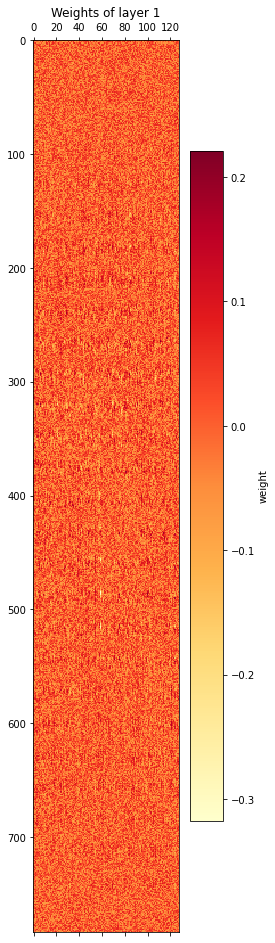

In [12]:
# weights of layer 1
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()

plt.matshow(mlp.coefs_[0], cmap="YlOrRd", vmin=vmin, vmax=vmax)
plt.colorbar(label="weight", orientation="vertical")
plt.title("Weights of layer 1")
plt.show()

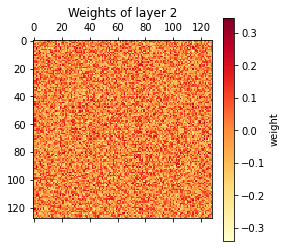

In [13]:
# weights of layer 2
vmin, vmax = mlp.coefs_[1].min(), mlp.coefs_[1].max()

plt.matshow(mlp.coefs_[1], cmap="YlOrRd", vmin=vmin, vmax=vmax)
plt.colorbar(label="weight", orientation="vertical")
plt.title("Weights of layer 2")
plt.show()

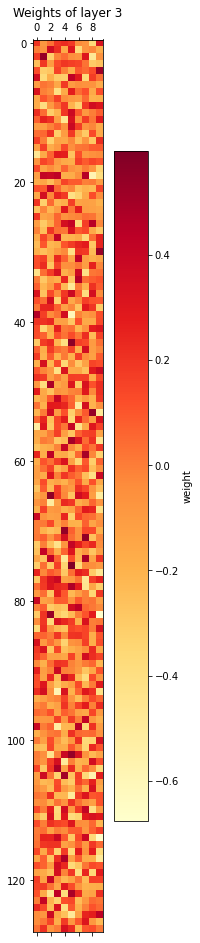

In [14]:
# weights of layer 3
vmin, vmax = mlp.coefs_[2].min(), mlp.coefs_[2].max()

plt.matshow(mlp.coefs_[2], cmap="YlOrRd", vmin=vmin, vmax=vmax)
plt.colorbar(label="weight", orientation="vertical")
plt.title("Weights of layer 3")
plt.show()